# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


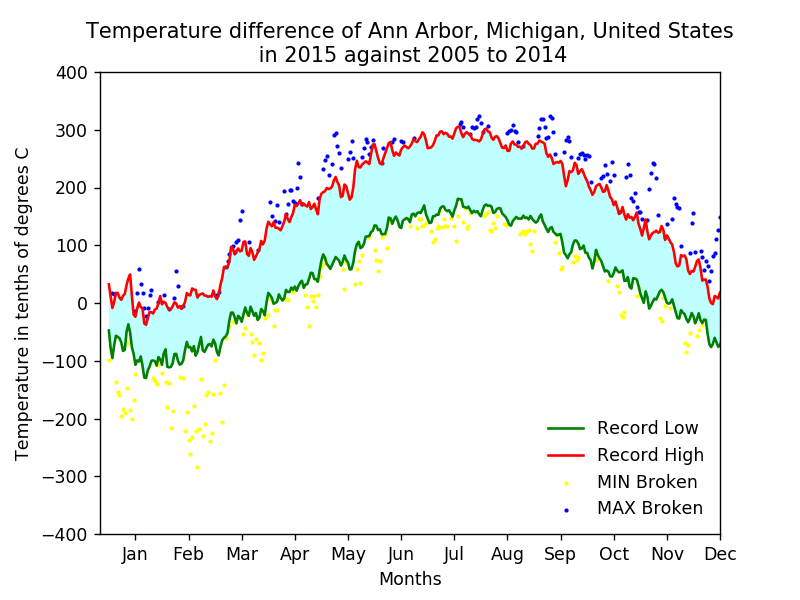

([<matplotlib.axis.XTick at 0x7fcfca9a96d8>,
 <a list of 12 Text xticklabel objects>)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Reading the give data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Sorting the given data based on the date and Station Id
df = df.sort_values(by = ['ID', 'Date'])

# Splliting the date into year and month-day format
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month - Day'] = df['Date'].apply(lambda x: x[5:])

# Taking out the leap year constraint - removing feb 29 from the list
df = df[df['Month - Day'] != '02-29']

# Seperating out max temperatures and min temperatures using the 'Element' column
df_minimum = df[df['Element'] == 'TMIN']
df_maximum = df[df['Element'] == 'TMAX']

# Seperating out data for the year 2005 to 2014
df_min_05_to_14 = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
df_max_05_to_14 = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]

# Computing MEAN of min and max temperatures of each day in a month from the years 2005 to 2014
min_mean_05_to_14 = df_min_05_to_14.groupby('Month - Day')['Data_Value'].agg({'Mean_minimum' : np.mean})
max_mean_05_to_14 = df_max_05_to_14.groupby('Month - Day')['Data_Value'].agg({'Mean_maximum' : np.mean})

# Seperating out data for the year 2015
df_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')]
df_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')]

# Computing MEAN of min and max temperatures of each day in a month in the year 2015
min_mean_15 = df_min_15.groupby('Month - Day')['Data_Value'].agg({'Mean_minimum_15' : np.mean})
max_mean_15 = df_max_15.groupby('Month - Day')['Data_Value'].agg({'Mean_maximum_15' : np.mean})

# Resetting the index for both the dataframes - Data from year 2005 to 2014 - Min and Max temperatures
min_mean_05_to_14 = min_mean_05_to_14.reset_index()
max_mean_05_to_14 = max_mean_05_to_14.reset_index()

# Resetting the index for both the dataframes - Data for year 2015 - Min and Max temperatures
min_mean_15 = min_mean_15.reset_index()
max_mean_15 = max_mean_15.reset_index() 

# Plotting a figure
plt.figure()

# Plotting a line graph for min and max temperatures in the year 2005 to 2014
plt.plot(min_mean_05_to_14['Mean_minimum'], c='green', label = 'Record Low')
plt.plot(max_mean_05_to_14['Mean_maximum'], c='red', label = 'Record High')

# Evaluating the temperature record break between the data from year 2005 to 2014 and data in year 2015
min_broken = (min_mean_15[min_mean_15['Mean_minimum_15'] < min_mean_05_to_14['Mean_minimum']]).index.tolist()
max_broken = (min_mean_15[max_mean_15['Mean_maximum_15'] > max_mean_05_to_14['Mean_maximum']]).index.tolist()

# Plotting a scatter graph for the record breaking temperatures in the year 2015
plt.scatter(min_broken, min_mean_15['Mean_minimum_15'].iloc[min_broken], s=2, c='yellow', label = 'MIN Broken' )
plt.scatter(max_broken, max_mean_15['Mean_maximum_15'].iloc[max_broken], s=2, c='blue', label = 'MAX Broken' )

# Filling between the the two line graphs with 'CYAN' color
plt.gca().fill_between(range(len(min_mean_05_to_14)), 
                       min_mean_05_to_14['Mean_minimum'], max_mean_05_to_14['Mean_maximum'], 
                       facecolor='cyan', alpha=0.25)

# Adding labels, legends, Axis, and Axis ticks
plt.xlabel('Months')
plt.ylabel('Temperature in tenths of degrees C')
plt.title('Temperature difference of Ann Arbor, Michigan, United States\n in 2015 against 2005 to 2014')
plt.legend(loc=4, frameon = False)
plt.gca().axis([-5, 36, -400, 400])

# Changing the x-xis tick labels from the index of the dataset to the months in a year
Match_for_month = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
reorder = [i+15 for i in Match_for_month] # for proper positioning of the x-tick labels 
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(reorder, Month_name)
